<a href="https://colab.research.google.com/github/gabrielsantosds/credit_risk_test_1/blob/main/Modelagem_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo** - Crédito

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Tratamento de base**

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Datasets/credit_customers.csv", sep = ",")

In [16]:
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [22]:
# Transformando as species em número
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

checking_status =  label_encoder.fit_transform(df.checking_status)
df["checking_status"] = checking_status

credit_history =  label_encoder.fit_transform(df.credit_history)
df["credit_history"] = credit_history

purpose	 =  label_encoder.fit_transform(df.purpose)
df["purpose"] = purpose

savings_status	 =  label_encoder.fit_transform(df.savings_status)
df["savings_status"] = savings_status

employment =  label_encoder.fit_transform(df.employment)
df["employment"] = employment

personal_status =  label_encoder.fit_transform(df.personal_status)
df["personal_status"] = personal_status

other_parties =  label_encoder.fit_transform(df.other_parties)
df["other_parties"] = other_parties

property_magnitude =  label_encoder.fit_transform(df.property_magnitude)
df["property_magnitude"] = property_magnitude

other_payment_plans =  label_encoder.fit_transform(df.other_payment_plans)
df["other_payment_plans"] = other_payment_plans

housing =  label_encoder.fit_transform(df.housing)
df["housing"] = housing

job =  label_encoder.fit_transform(df.job)
df["job"] = job

own_telephone =  label_encoder.fit_transform(df.own_telephone)
df["own_telephone"] = own_telephone

foreign_worker =  label_encoder.fit_transform(df.foreign_worker)
df["foreign_worker"] = foreign_worker

class_ =  label_encoder.fit_transform(df["class"])
df["class"] = class_

df["target"] = df["class"]

df = df.drop("class", axis = 1)
df.head(4)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int64  
 9   other_parties           1000 non-null   int64  
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int64  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int64  
 14  housing                 1000 non-null   i

In [24]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
target                    0
dtype: int64

**Análise gráfica**

In [34]:
correlation = df.corr()

correlation['target'].sort_values(ascending=False)

target                    1.000000
checking_status           0.302406
purpose                   0.138152
savings_status            0.103133
age                       0.091127
personal_status           0.089535
property_magnitude        0.055529
other_payment_plans       0.053862
existing_credits          0.045732
own_telephone             0.036466
job                       0.032756
other_parties             0.028441
num_dependents            0.003015
residence_since          -0.002967
employment               -0.008932
housing                  -0.019315
installment_commitment   -0.072404
foreign_worker           -0.082079
credit_history           -0.097054
credit_amount            -0.154739
duration                 -0.214927
Name: target, dtype: float64

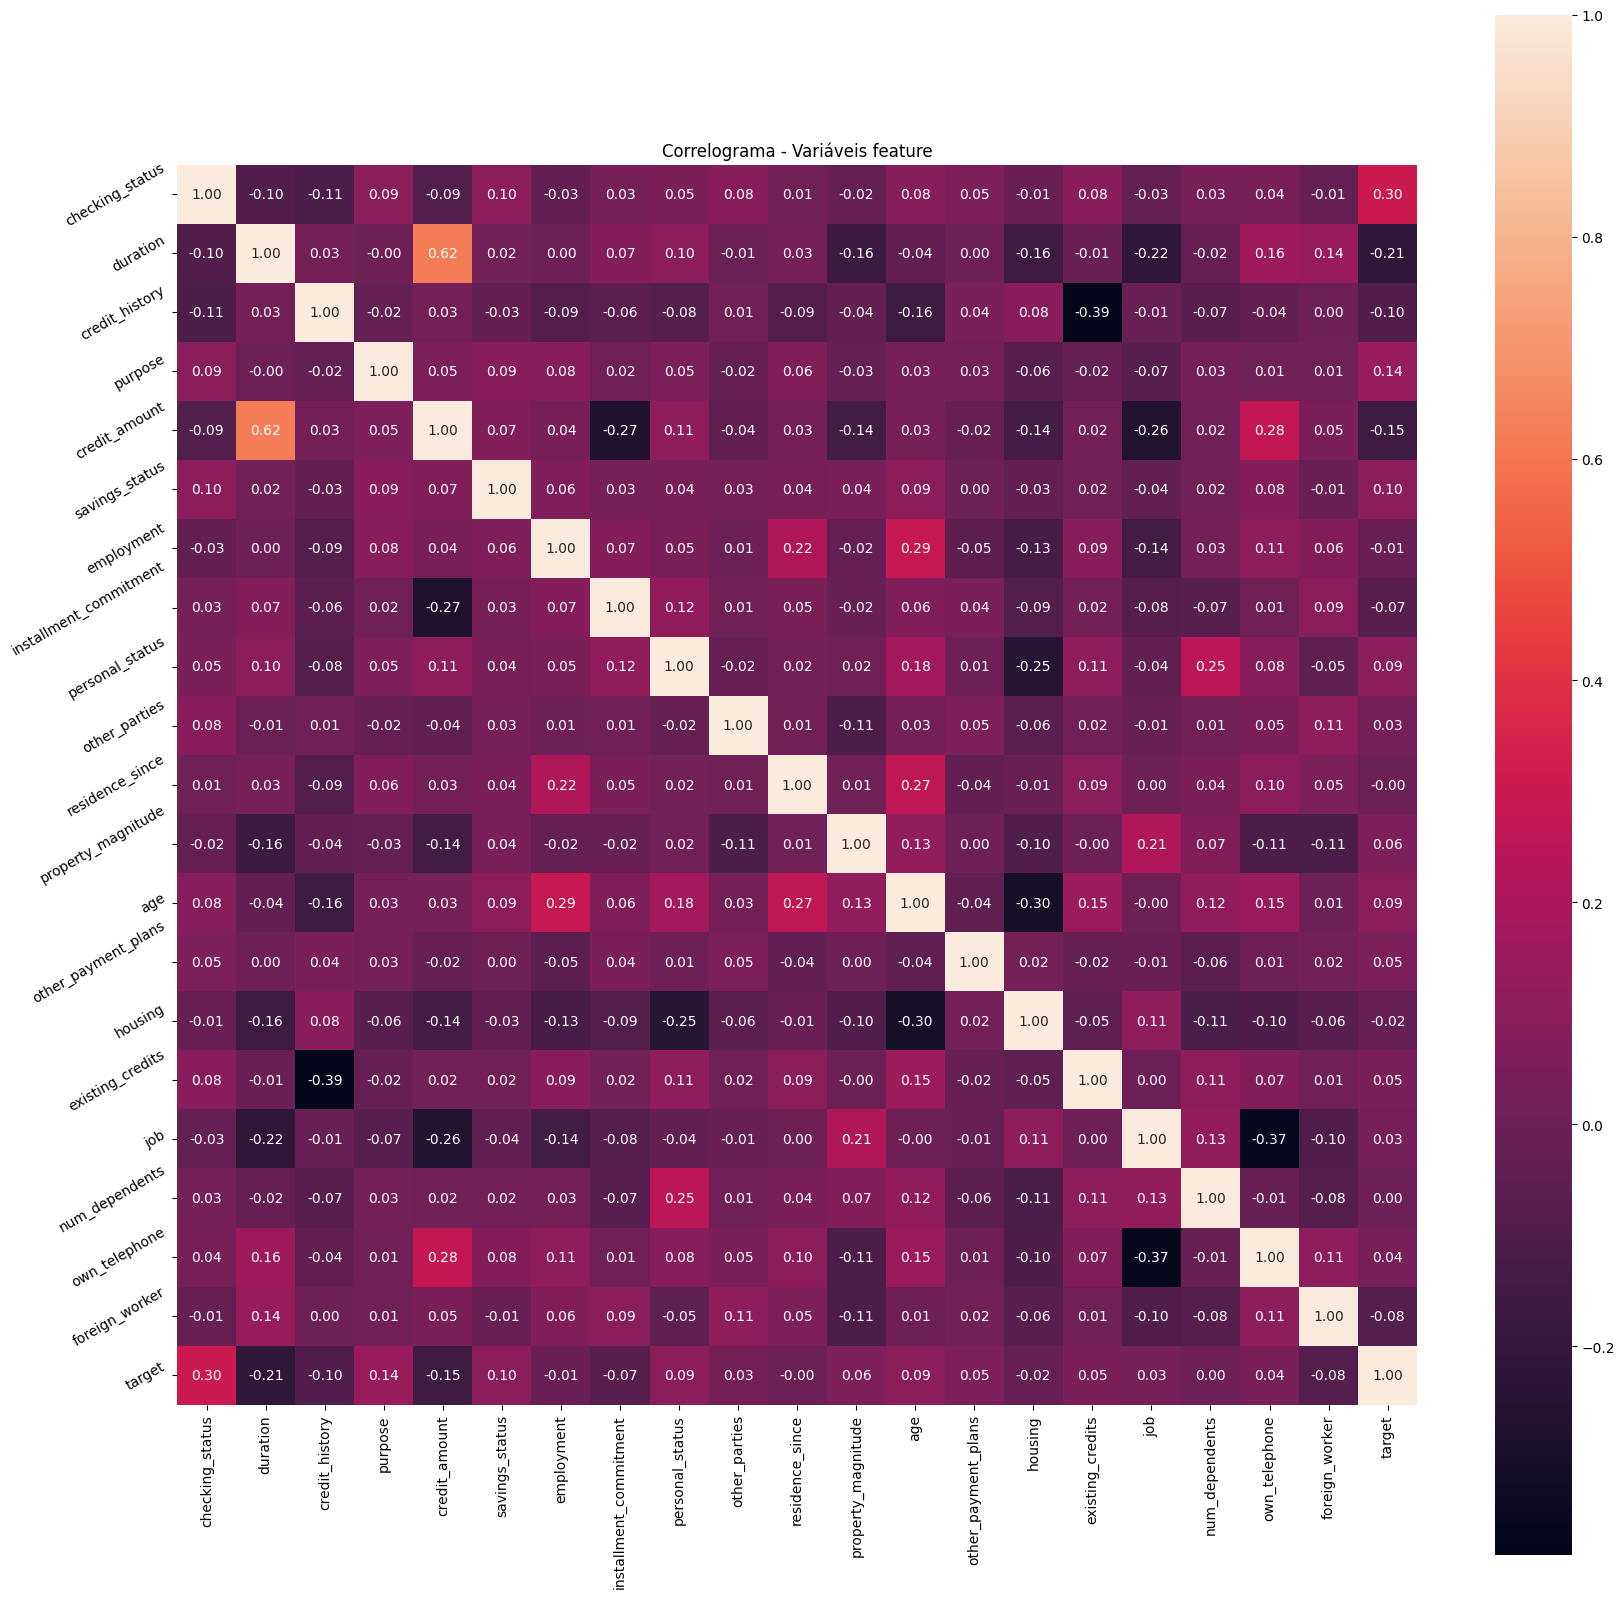

In [36]:
#Analise de correlação
plt.figure(figsize=(20,20))
plt.title('Correlograma - Variáveis feature')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

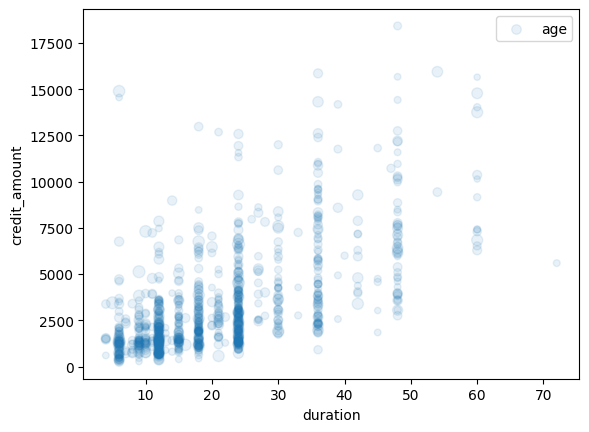

In [37]:
#gráfico1

df.plot(kind = "scatter", x="duration", y="credit_amount", alpha = 0.1, s=df["age"], label = "age", cmap=plt.get_cmap("jet"), colorbar=False)
plt.legend()

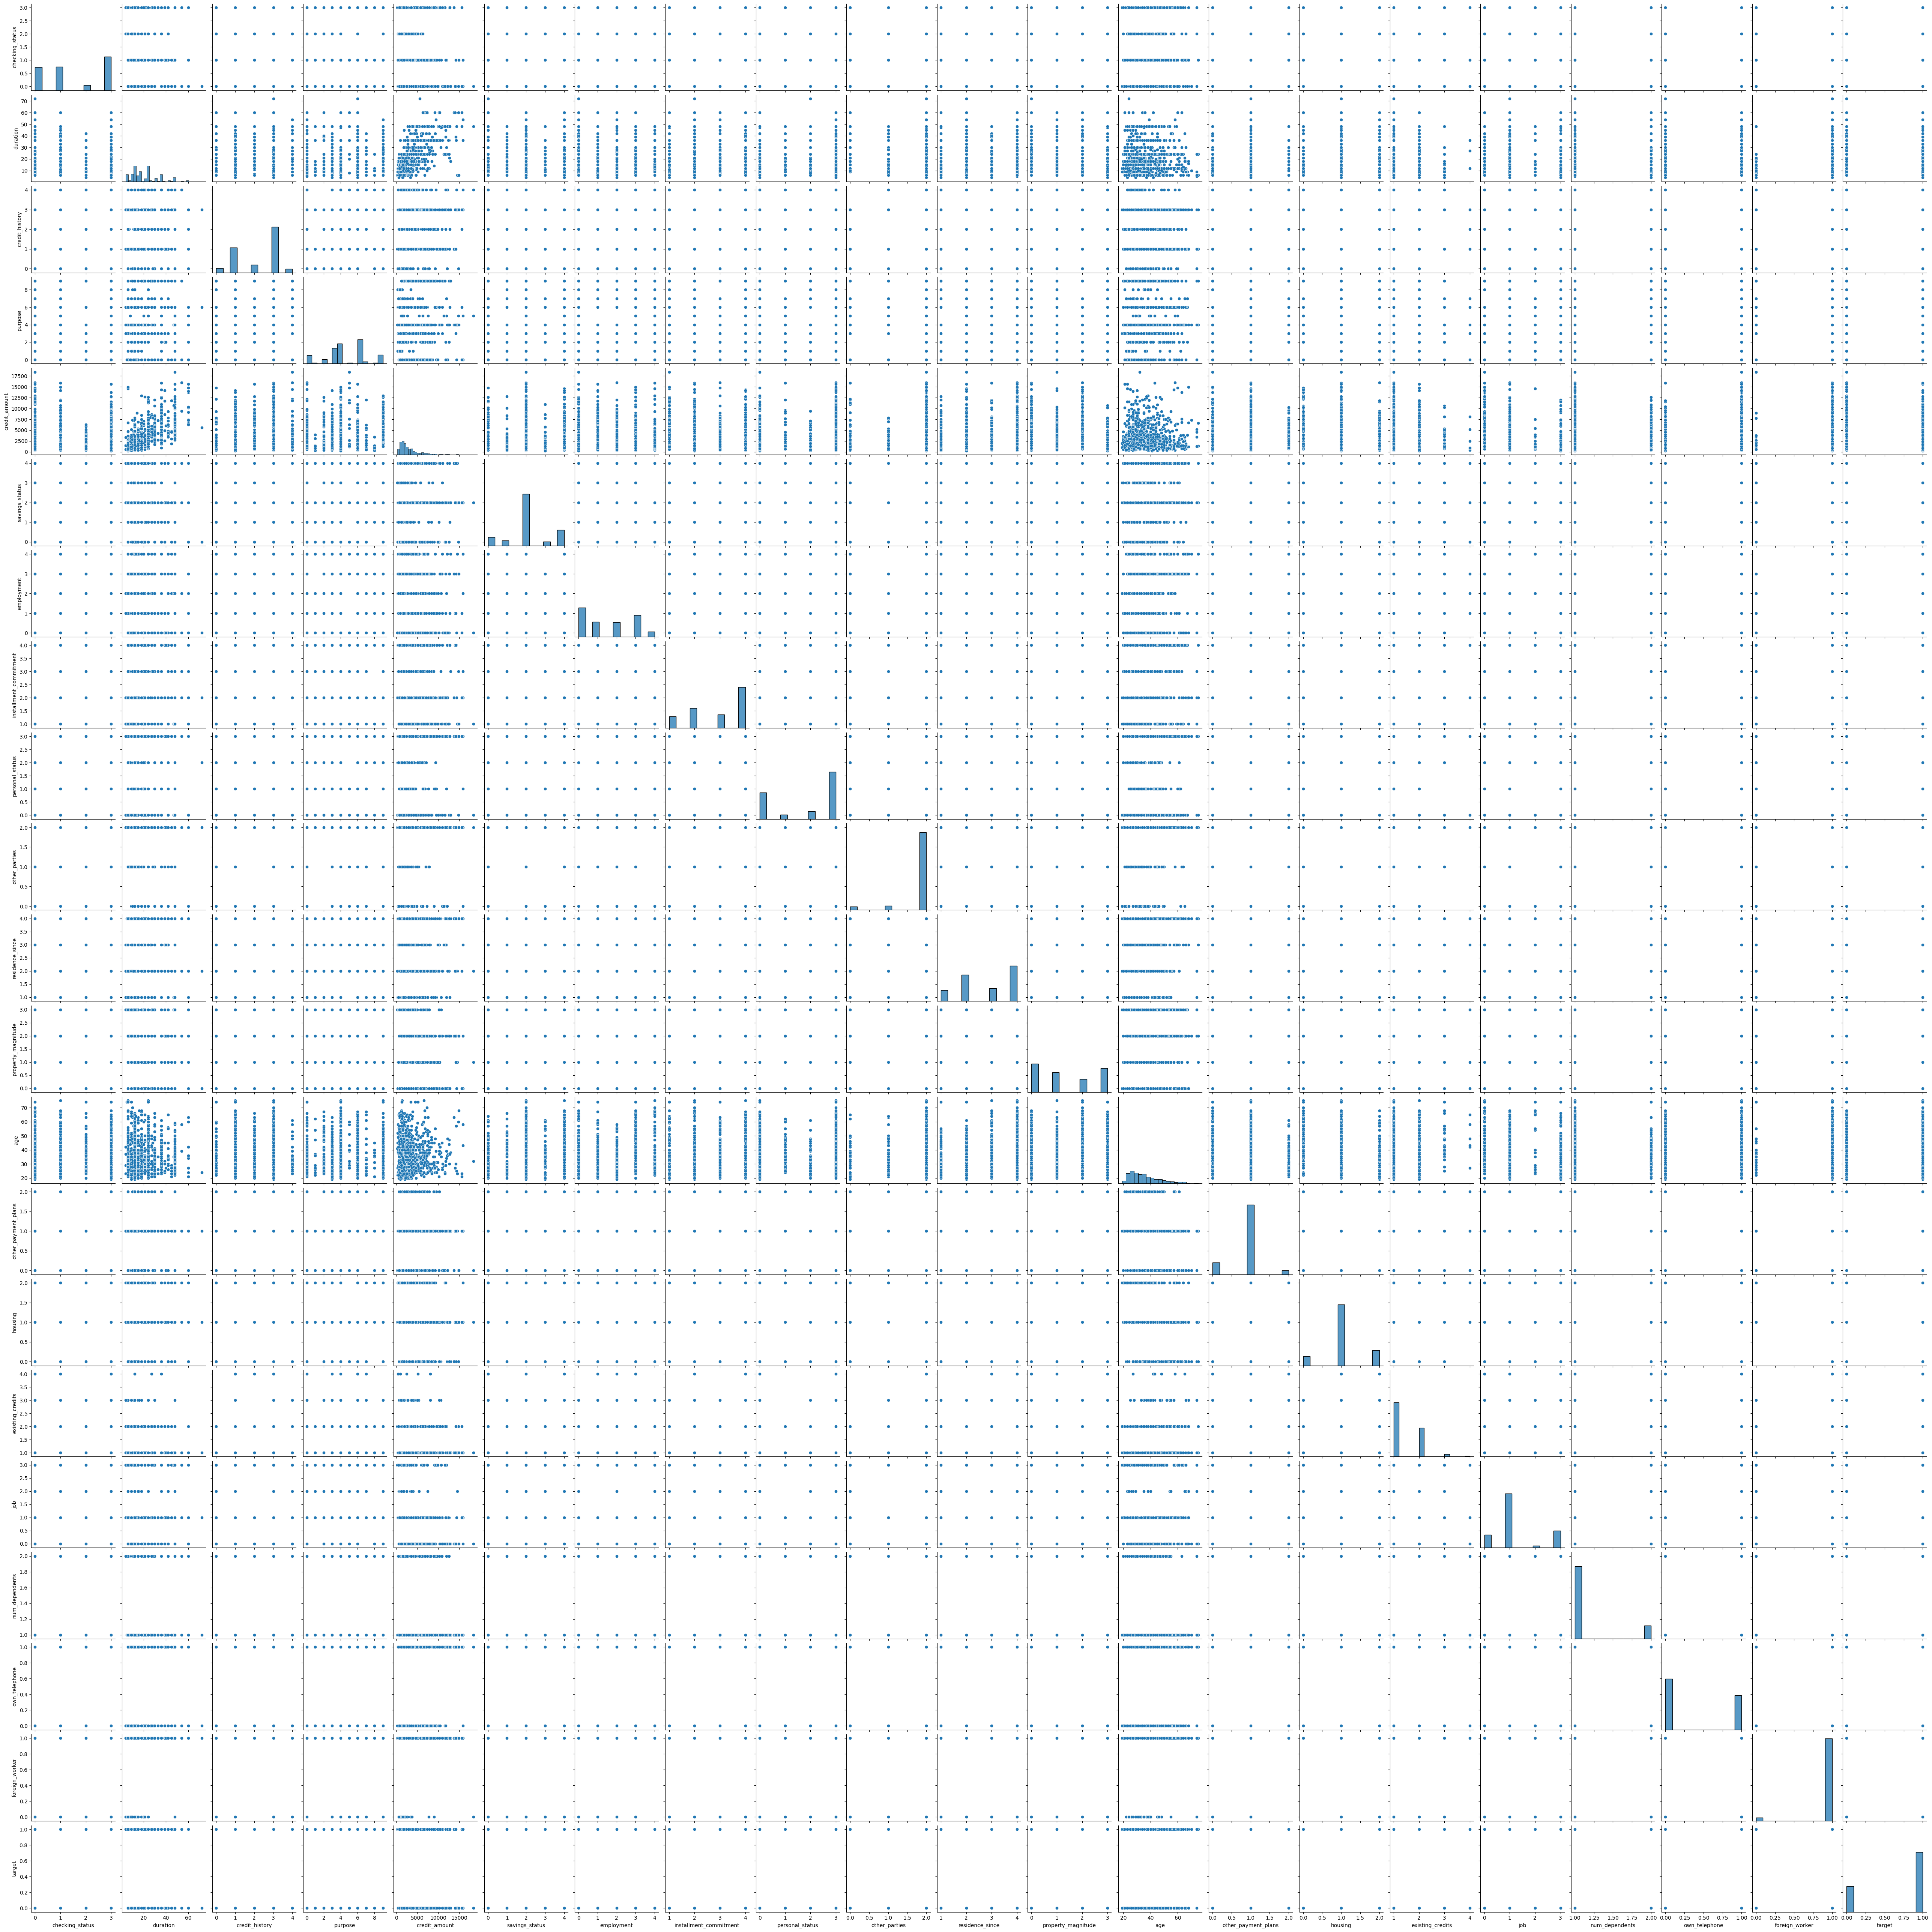

In [38]:
sns.pairplot(df, kind="scatter")
plt.show()

**Modelo**

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
# Definição de features e targets
X = df.drop("target", axis = 1)
y = df["target"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42, stratify=y)

In [50]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7033333333333334

In [53]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [54]:
predict = model.predict(X_test)
predictions = pd.DataFrame(predict[:,])
predictions

,0
0,1
1,1
2,1
3,1
4,0
...,...
295,1
296,0
297,1
298,1


In [55]:
prob = model.predict_proba(X_test)
probability = pd.DataFrame(prob[:, 1])
probability.head(100)

,0
0,0.932543
1,0.860138
2,0.933822
3,0.864011
4,0.426920
...,...
95,0.423483
96,0.782261
97,0.431007
98,0.812024


In [56]:
df["probability"] = probability
df["predictions"] = predictions
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target,probability,predictions
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,1,1,2.0,1,1.0,1,1,1,0.932543,1.0
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,1,1,1.0,1,1.0,0,1,0,0.860138,1.0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,1,1,1.0,3,2.0,0,1,1,0.933822,1.0
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,0,1.0,1,2.0,0,1,1,0.864011,1.0
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,1,0,2.0,1,2.0,0,1,0,0.426920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,1,1,1.0,3,1.0,0,1,1,NaN,NaN
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,1,1.0,0,1.0,1,1,1,NaN,NaN
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,1,1,1.0,1,1.0,0,1,1,NaN,NaN
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,1,0,1.0,1,1.0,1,1,0,NaN,NaN


In [57]:
df.to_excel("modelo_credito.xlsx")

# **Modelo -** Credit Behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**OBS:** O dataset é enorme e consiste em vários fatores determinísticos, como renda, sexo, finalidade do empréstimo, etc. O conjunto de dados está sujeito a forte multicolinearidade e valores vazios.

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Datasets/Loan_Default.csv", sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

**Tratamento de Base**

In [19]:
df[["ID","loan_limit","Gender", "approv_in_adv",	"loan_type",	"loan_purpose", "Credit_Worthiness",	"open_credit", "Credit_Score", "age",	"Region",  "rate_of_interest", "Interest_rate_spread", "Upfront_charges","term", "Status"]]

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,Credit_Score,age,Region,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Status
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,758,25-34,south,NaN,NaN,NaN,360.0,1
1,24891,cf,Male,nopre,type2,p1,l1,nopc,552,55-64,North,NaN,NaN,NaN,360.0,1
2,24892,cf,Male,pre,type1,p1,l1,nopc,834,35-44,south,4.560,0.2000,595.00,360.0,0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,587,45-54,North,4.250,0.6810,NaN,360.0,0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,602,25-34,North,4.000,0.3042,0.00,360.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,nopre,type1,p3,l1,nopc,659,55-64,south,3.125,0.2571,9960.00,180.0,0
148666,173556,cf,Male,nopre,type1,p1,l1,nopc,569,25-34,south,5.190,0.8544,0.00,360.0,0
148667,173557,cf,Male,nopre,type1,p4,l1,nopc,702,45-54,North,3.125,0.0816,1226.64,180.0,0
148668,173558,cf,Female,nopre,type1,p4,l1,nopc,737,55-64,North,3.500,0.5824,4323.33,180.0,0


In [10]:
df.loan_limit.value_counts()
# df.loan_limit.info()

#Valores não nulos e sem reporte missing

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [15]:
# Transformando as species em número
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

loan_limit =  label_encoder.fit_transform(df.loan_limit)
df["loan_limit"] = loan_limit
df.loan_limit.value_counts()

0    135348
1      9978
2      3344
Name: loan_limit, dtype: int64

In [21]:
df["Gender"].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [24]:
Gender =  label_encoder.fit_transform(df.Gender)
df["Gender"] = Gender
df["Gender"].value_counts()


2    42346
1    41399
3    37659
0    27266
Name: Gender, dtype: int64

In [27]:
df["approv_in_adv"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [26]:
approv_in_adv =  label_encoder.fit_transform(df.approv_in_adv)
df["approv_in_adv"] = approv_in_adv
df["approv_in_adv"].value_counts()

0    124621
1     23141
2       908
Name: approv_in_adv, dtype: int64

# **Modelo -** Credit Behavior (Base simplificada) - 96% de acurácia

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**OBS:** O dataset é enorme e consiste em vários fatores determinísticos, como renda, sexo, finalidade do empréstimo, etc. O conjunto de dados está sujeito a forte multicolinearidade e valores vazios.

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Datasets/Default_Fin.csv", sep = ",")
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [35]:
df = df.drop("Index", axis =1)

In [37]:
# definição de feature e target
X = df.drop("Defaulted?", axis = 1)
y = df["Defaulted?"]

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [42]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()

In [43]:
lreg.fit(X_train, y_train)

lreg.score(X_test, y_test)

0.9683333333333334

In [46]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [52]:
predict = model.predict(X_test)
predictions = pd.DataFrame(predict[:,])


prob = model.predict_proba(X_test)
probability = pd.DataFrame(prob[:,1])
probability

df["predictions"] = predictions
df["probability"] = probability

In [54]:
df

,Employed,Bank Balance,Annual Salary,Defaulted?,predictions,probability
0,1,8754.36,532339.56,0,0.0,0.033556
1,0,9806.16,145273.56,0,0.0,0.006428
2,1,12882.60,381205.68,0,0.0,0.057391
3,1,6351.00,428453.88,0,0.0,0.015433
4,1,9427.92,461562.00,0,0.0,0.003147
...,...,...,...,...,...,...
9995,1,8538.72,635908.56,0,NaN,NaN
9996,1,9095.52,235928.64,0,NaN,NaN
9997,1,10144.92,703633.92,0,NaN,NaN
9998,1,18828.12,440029.32,0,NaN,NaN


In [53]:
df.to_excel("modelo_credito_2.xlsx")